# Fashion Mnist 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("fashion-mnist_train.csv")
test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop the label column from the dataframes

In [5]:
train_nonlabel=train.drop(['label'],axis=1)
train_nonlabel.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_nonlabel=test.drop(['label'],axis=1)
test_nonlabel.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Generating clusters using k-means algorithm.

In [7]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10,random_state=7)
kmeans_model = kmeans.fit(train_nonlabel)
clusters = kmeans_model.predict(test_nonlabel)
kmeans_model.cluster_centers_.shape

(10, 784)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

fig, ax = plt.subplots(2,5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [9]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask]=mode(test["label"][mask])[0]

Calculating the accuracy of the k-means algorithm used above.

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(test["label"],labels)

0.5813

# Implementing principal component analysis for varying number of components( 1 to 9)

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=1)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.3156

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1','pc2'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1','pc2'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.4364

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1','pc2','pc3'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1','pc2','pc3'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.4639

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1','pc2','pc3','pc4'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1','pc2','pc3','pc4'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.5047

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=5)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.5081

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=6)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5','pc6'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5','pc6'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.5619

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=7)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5','pc6','pca7'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5','pca6','pca7'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.5685

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=8)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5','pc6','pca7','pca8'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5','pca6','pca7','pca8'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.5458

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_nonlabel)
test_scaled=scaler.fit_transform(test_nonlabel)


from sklearn.decomposition import PCA

pca = PCA(n_components=9)

principal_components1 = pca.fit_transform(train_scaled)
principal_components2 = pca.fit_transform(test_scaled)
                    
train_proj = pd.DataFrame(data = principal_components1, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5','pc6','pca7','pca8','pca9'])
test_proj=pd.DataFrame(data = principal_components2, 
                           columns = ['pc_1','pc2','pc3','pc4','pc5','pca6','pca7','pca8','pca9'])

kmeans = KMeans(n_clusters=10, random_state=7)
Kmeans = kmeans.fit(train_proj)
clusters=Kmeans.predict(test_proj)
# Permute the labels
labels=np.zeros_like(clusters)
for  i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.5444

Comment: The best level of accuracy obtained on using PCA for the above trials is for the case 7-component PCA, that is, 5685.

# Implementing TSNE algorithm

In [20]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
train_proj = tsne.fit_transform(train_nonlabel)
test_proj=tsne.fit_transform(test_nonlabel)


# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=7)


kmeans_model = kmeans.fit(train_proj)
clusters=kmeans_model.predict(test_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(test["label"][mask])[0]

# Compute the accuracy
accuracy_score(test["label"], labels)

0.5921

Comment: On comparing the accuracies of K-means, PCA and TSNE the best level of accuracy is obtained from TSNE

In [21]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA#, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


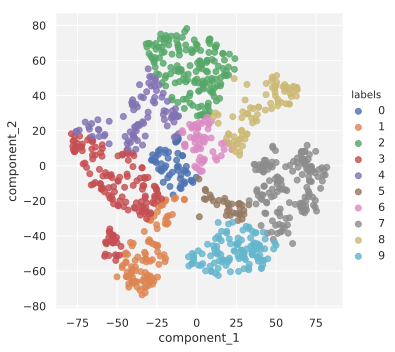

In [22]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(test_proj)
proj.columns = ["component_1", "component_2"]
proj["labels"] = labels
sns.lmplot("component_1", "component_2", hue = "labels", data = proj.sample(1000) ,fit_reg=False)
print("ready")